In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

In [4]:
cabdata = pd.read_csv("/Users/kashishhj/repos/DataSets/Cab_Data.csv")

In [5]:
city = pd.read_csv("/Users/kashishhj/repos/DataSets/City.csv")

In [6]:
trancation = pd.read_csv("/Users/kashishhj/repos/DataSets/Transaction_ID.csv")

In [7]:
customer = pd.read_csv("/Users/kashishhj/repos/DataSets/Customer_ID.csv")

In [8]:
holidaydata = pd.read_csv("/Users/kashishhj/repos/DataSets/US Holiday Dates (2004-2021).csv")

In [9]:
from datetime import datetime, timedelta

In [10]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [11]:
cabdata['Date of Travel']=cabdata['Date of Travel'].apply(lambda x:to_date_format(x))


In [12]:
cabdata=cabdata.sort_values(by=['Date of Travel'])
cabdata=cabdata.reset_index(drop= True )

print('Filas =',cabdata.shape[0], '  y   Columnas = ', cabdata.shape[1])
cabdata.head(10)


Filas = 359392   y   Columnas =  7


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840
5,10001009,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000
6,10000605,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024
7,10001014,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000
8,10000600,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000
9,10000182,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000


In [13]:
holidaydata.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [14]:
holidaydata['Date'] = pd.to_datetime(holidaydata['Date'])

In [15]:
holidaydata.dtypes

Date       datetime64[ns]
Holiday            object
WeekDay            object
Month               int64
Day                 int64
Year                int64
dtype: object

In [16]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [19]:
masterdata = cabdata.merge(trancation, on= 'Transaction ID').merge(customer, on ='Customer ID').merge(city, on = 'City')

In [24]:
masterdata.merge(holidaydata,how='left', left_on='Company', right_on='Date')

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [25]:
result

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10001340.0,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536.0,Card,Male,24.0,10606.0,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
1,10020018.0,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536.0,Cash,Male,24.0,10606.0,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
2,10102932.0,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536.0,Cash,Male,24.0,10606.0,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
3,10164725.0,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536.0,Card,Male,24.0,10606.0,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
4,10188478.0,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536.0,Cash,Male,24.0,10606.0,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-04-16,Western Easter,Sunday,4.0,16.0,2006.0
338,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-16,Western Easter,Sunday,4.0,16.0,2017.0
339,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-20,Western Easter,Sunday,4.0,20.0,2014.0
340,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-21,Western Easter,Sunday,4.0,21.0,2019.0


In [26]:
masterdata["Date"] = holidaydata["Date"]

In [27]:
masterdata


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,2004-07-04
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,2005-07-04
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0,2006-07-04
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0,2007-07-04
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0,2008-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228,542085.0,3643.0,NaT
359388,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085.0,3643.0,NaT
359389,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085.0,3643.0,NaT
359390,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085.0,3643.0,NaT


In [28]:
holidaydata = holidaydata.drop(holidaydata[holidaydata["Year"] < 2016].index)

In [29]:
holidaydata

,Date,Holiday,WeekDay,Month,Day,Year
12,2016-07-04,4th of July,Monday,7,4,2016
13,2017-07-04,4th of July,Tuesday,7,4,2017
14,2018-07-04,4th of July,Wednesday,7,4,2018
15,2019-07-04,4th of July,Thursday,7,4,2019
16,2020-07-04,4th of July,Saturday,7,4,2020
...,...,...,...,...,...,...
328,2018-04-01,Western Easter,Sunday,4,1,2018
330,2021-04-04,Western Easter,Sunday,4,4,2021
336,2020-04-12,Western Easter,Sunday,4,12,2020
338,2017-04-16,Western Easter,Sunday,4,16,2017


In [30]:
holidaydata = holidaydata.drop(holidaydata[holidaydata["Year"] > 2018].index)

In [31]:
masterdata.merge(holidaydata,how='left', left_on='Date', right_on='Date')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,2004-07-04,NaN,NaN,NaN,NaN,NaN
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,2005-07-04,NaN,NaN,NaN,NaN,NaN
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0,2006-07-04,NaN,NaN,NaN,NaN,NaN
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0,2007-07-04,NaN,NaN,NaN,NaN,NaN
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0,2008-07-04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359389,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN
359390,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN
359391,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN
359392,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN


In [32]:
masterdata["Date"] = holidaydata["Date"]

In [33]:
masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,NaT
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,NaT
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0,NaT
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0,NaT
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228,542085.0,3643.0,NaT
359388,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085.0,3643.0,NaT
359389,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085.0,3643.0,NaT
359390,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085.0,3643.0,NaT


In [37]:
masterdata = masterdata.merge(holidaydata, on=['Date'])

In [38]:
masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10001291,2016-01-01,Yellow Cab,WASHINGTON DC,8.73,168.07,104.7600,53683,Card,Male,26,9389,418859.0,127001.0,2016-07-04,4th of July,Monday,7,4,2016
1,10025750,2016-04-14,Yellow Cab,WASHINGTON DC,2.85,46.01,34.8840,53683,Card,Male,26,9389,418859.0,127001.0,2017-07-04,4th of July,Tuesday,7,4,2017
2,10127859,2016-12-20,Yellow Cab,WASHINGTON DC,7.84,129.43,107.2512,53683,Cash,Male,26,9389,418859.0,127001.0,2018-07-04,4th of July,Wednesday,7,4,2018
3,10164608,2017-04-16,Yellow Cab,WASHINGTON DC,6.65,112.67,91.7700,53126,Card,Male,24,3032,418859.0,127001.0,2016-12-25,Christmas Day,Sunday,12,25,2016
4,10181246,2017-06-03,Yellow Cab,WASHINGTON DC,27.55,510.60,373.5780,53126,Cash,Male,24,3032,418859.0,127001.0,2017-12-25,Christmas Day,Monday,12,25,2017
5,10196498,2017-07-13,Yellow Cab,WASHINGTON DC,22.05,368.12,288.4140,53126,Card,Male,24,3032,418859.0,127001.0,2018-12-25,Christmas Day,Tuesday,12,25,2018
6,10193619,2017-07-07,Yellow Cab,WASHINGTON DC,20.23,287.74,269.4636,52880,Cash,Male,27,14140,418859.0,127001.0,2016-12-24,Christmas Eve,Saturday,12,24,2016
7,10211735,2017-08-18,Yellow Cab,WASHINGTON DC,25.99,397.62,355.5432,52880,Card,Male,27,14140,418859.0,127001.0,2017-12-24,Christmas Eve,Sunday,12,24,2017
8,10221647,2017-09-03,Yellow Cab,WASHINGTON DC,33.06,593.39,400.6872,52880,Cash,Male,27,14140,418859.0,127001.0,2018-12-24,Christmas Eve,Monday,12,24,2018
9,10338106,2018-06-07,Yellow Cab,WASHINGTON DC,23.92,477.69,338.7072,52880,Cash,Male,27,14140,418859.0,127001.0,2018-10-08,Columbus Day,Monday,10,8,2018


In [39]:
masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10001291,2016-01-01,Yellow Cab,WASHINGTON DC,8.73,168.07,104.7600,53683,Card,Male,26,9389,418859.0,127001.0,2016-07-04,4th of July,Monday,7,4,2016
1,10025750,2016-04-14,Yellow Cab,WASHINGTON DC,2.85,46.01,34.8840,53683,Card,Male,26,9389,418859.0,127001.0,2017-07-04,4th of July,Tuesday,7,4,2017
2,10127859,2016-12-20,Yellow Cab,WASHINGTON DC,7.84,129.43,107.2512,53683,Cash,Male,26,9389,418859.0,127001.0,2018-07-04,4th of July,Wednesday,7,4,2018
3,10164608,2017-04-16,Yellow Cab,WASHINGTON DC,6.65,112.67,91.7700,53126,Card,Male,24,3032,418859.0,127001.0,2016-12-25,Christmas Day,Sunday,12,25,2016
4,10181246,2017-06-03,Yellow Cab,WASHINGTON DC,27.55,510.60,373.5780,53126,Cash,Male,24,3032,418859.0,127001.0,2017-12-25,Christmas Day,Monday,12,25,2017
5,10196498,2017-07-13,Yellow Cab,WASHINGTON DC,22.05,368.12,288.4140,53126,Card,Male,24,3032,418859.0,127001.0,2018-12-25,Christmas Day,Tuesday,12,25,2018
6,10193619,2017-07-07,Yellow Cab,WASHINGTON DC,20.23,287.74,269.4636,52880,Cash,Male,27,14140,418859.0,127001.0,2016-12-24,Christmas Eve,Saturday,12,24,2016
7,10211735,2017-08-18,Yellow Cab,WASHINGTON DC,25.99,397.62,355.5432,52880,Card,Male,27,14140,418859.0,127001.0,2017-12-24,Christmas Eve,Sunday,12,24,2017
8,10221647,2017-09-03,Yellow Cab,WASHINGTON DC,33.06,593.39,400.6872,52880,Cash,Male,27,14140,418859.0,127001.0,2018-12-24,Christmas Eve,Monday,12,24,2018
9,10338106,2018-06-07,Yellow Cab,WASHINGTON DC,23.92,477.69,338.7072,52880,Cash,Male,27,14140,418859.0,127001.0,2018-10-08,Columbus Day,Monday,10,8,2018


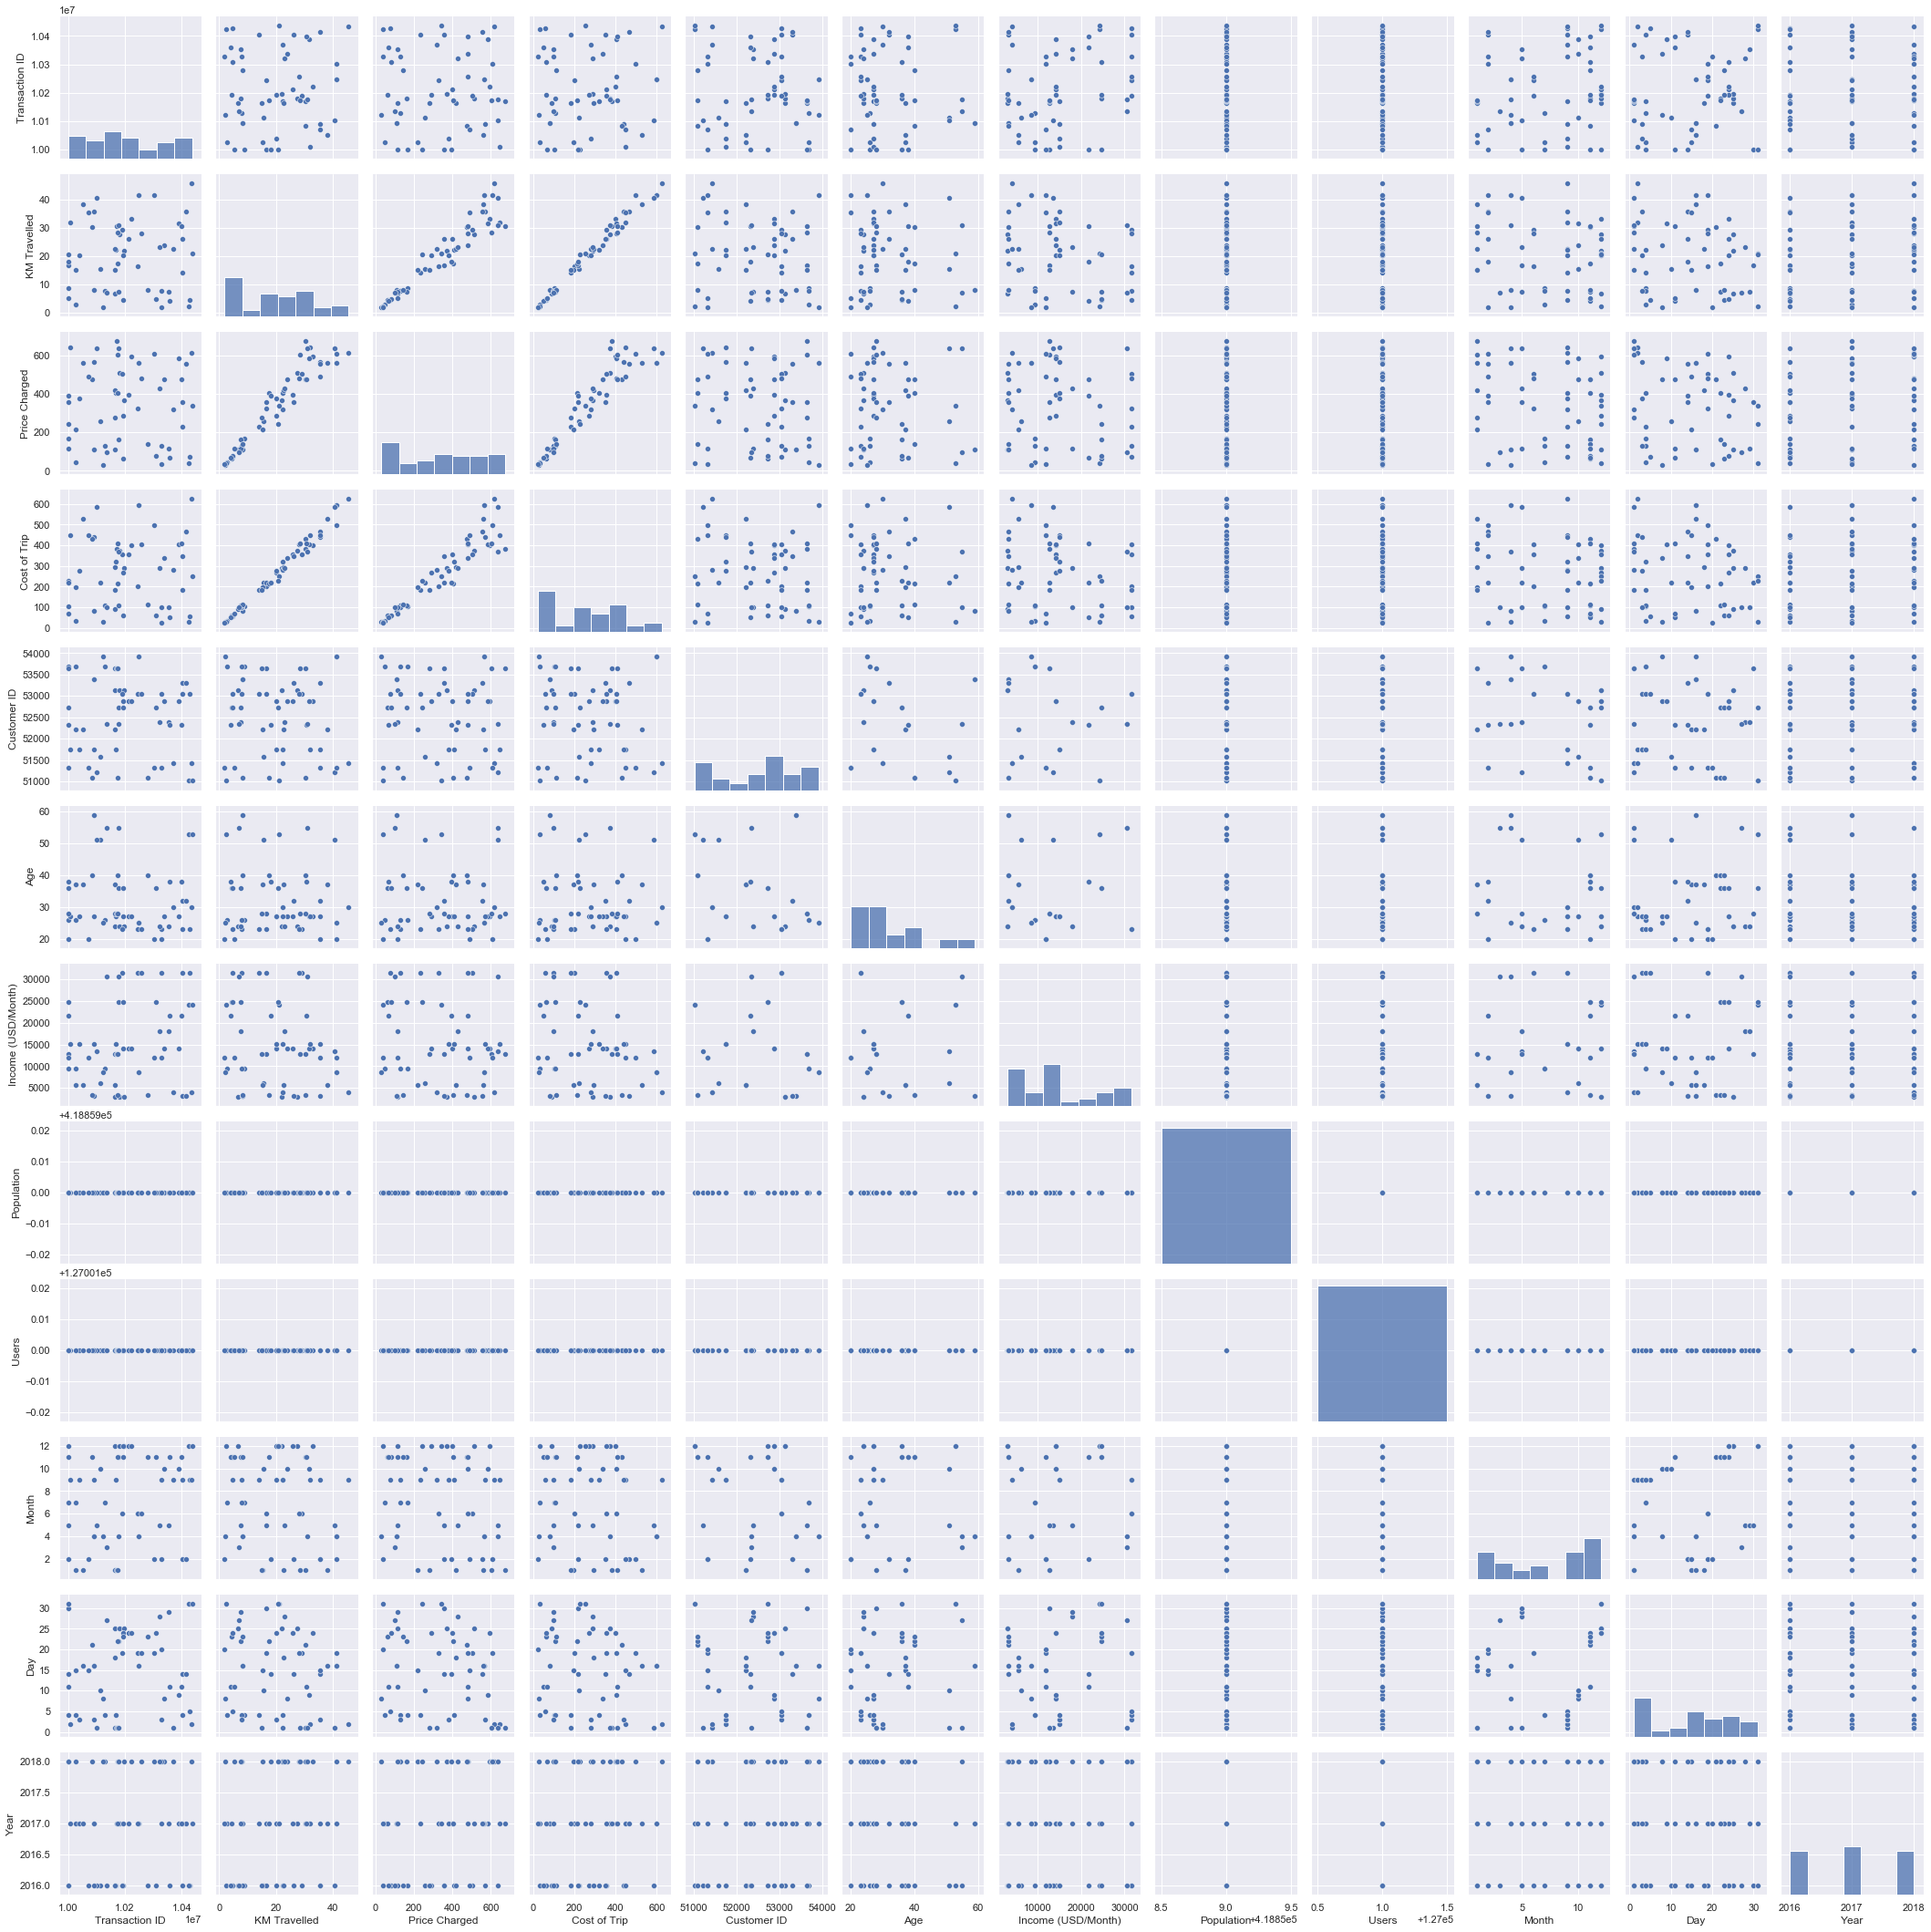

In [40]:
sns.pairplot(masterdata)

Text(0.5, 0, 'Km Travelled')

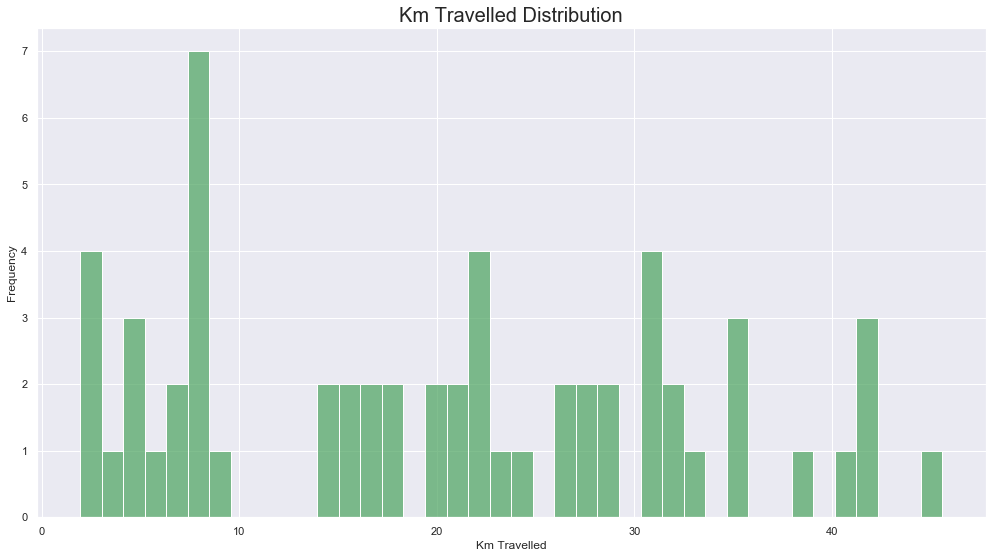

In [41]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=masterdata, x="KM Travelled",bins=40, color= 'g')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

In [42]:
masterdata['Income (USD/Month)'] = masterdata['Income (USD/Month)'].astype(float)
masterdata['Population'] = masterdata['Population'].astype(int)
masterdata['Users'] = masterdata['Users'].astype(int)
masterdata.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                     int64
Users                          int64
Date                  datetime64[ns]
Holiday                       object
WeekDay                       object
Month                          int64
Day                            int64
Year                           int64
dtype: object

In [43]:
masterdata.apply(lambda x: sum(x.isnull()),axis=0)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Date                  0
Holiday               0
WeekDay               0
Month                 0
Day                   0
Year                  0
dtype: int64

In [44]:
duplicated_rows = masterdata[masterdata.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


In [45]:
masterdata['Year of Travel'] = masterdata['Date of Travel'].dt.year
masterdata['Month of Travel'] = masterdata['Date of Travel'].dt.month
masterdata['Day of Travel'] = masterdata['Date of Travel'].dt.day
masterdata['Profit'] = masterdata['Price Charged'] -masterdata['Cost of Trip']

In [46]:
masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Date,Holiday,WeekDay,Month,Day,Year,Year of Travel,Month of Travel,Day of Travel,Profit
0,10001291,2016-01-01,Yellow Cab,WASHINGTON DC,8.73,168.07,104.7600,53683,Card,Male,...,2016-07-04,4th of July,Monday,7,4,2016,2016,1,1,63.3100
1,10025750,2016-04-14,Yellow Cab,WASHINGTON DC,2.85,46.01,34.8840,53683,Card,Male,...,2017-07-04,4th of July,Tuesday,7,4,2017,2016,4,14,11.1260
2,10127859,2016-12-20,Yellow Cab,WASHINGTON DC,7.84,129.43,107.2512,53683,Cash,Male,...,2018-07-04,4th of July,Wednesday,7,4,2018,2016,12,20,22.1788
3,10164608,2017-04-16,Yellow Cab,WASHINGTON DC,6.65,112.67,91.7700,53126,Card,Male,...,2016-12-25,Christmas Day,Sunday,12,25,2016,2017,4,16,20.9000
4,10181246,2017-06-03,Yellow Cab,WASHINGTON DC,27.55,510.60,373.5780,53126,Cash,Male,...,2017-12-25,Christmas Day,Monday,12,25,2017,2017,6,3,137.0220
5,10196498,2017-07-13,Yellow Cab,WASHINGTON DC,22.05,368.12,288.4140,53126,Card,Male,...,2018-12-25,Christmas Day,Tuesday,12,25,2018,2017,7,13,79.7060
6,10193619,2017-07-07,Yellow Cab,WASHINGTON DC,20.23,287.74,269.4636,52880,Cash,Male,...,2016-12-24,Christmas Eve,Saturday,12,24,2016,2017,7,7,18.2764
7,10211735,2017-08-18,Yellow Cab,WASHINGTON DC,25.99,397.62,355.5432,52880,Card,Male,...,2017-12-24,Christmas Eve,Sunday,12,24,2017,2017,8,18,42.0768
8,10221647,2017-09-03,Yellow Cab,WASHINGTON DC,33.06,593.39,400.6872,52880,Cash,Male,...,2018-12-24,Christmas Eve,Monday,12,24,2018,2017,9,3,192.7028
9,10338106,2018-06-07,Yellow Cab,WASHINGTON DC,23.92,477.69,338.7072,52880,Cash,Male,...,2018-10-08,Columbus Day,Monday,10,8,2018,2018,6,7,138.9828


In [47]:
masterdata_st=masterdata.set_index('Date of Travel')

In [48]:
masterdata_st.sort_values('Date of Travel').head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,...,Date,Holiday,WeekDay,Month,Day,Year,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-01,10001291,Yellow Cab,WASHINGTON DC,8.73,168.07,104.7600,53683,Card,Male,26,...,2016-07-04,4th of July,Monday,7,4,2016,2016,1,1,63.3100
2016-01-01,10001268,Yellow Cab,WASHINGTON DC,16.64,355.94,217.6512,53651,Cash,Male,28,...,2016-05-30,Memorial Day,Monday,5,30,2016,2016,1,1,138.2888
2016-01-01,10000379,Pink Cab,WASHINGTON DC,20.58,241.78,226.3800,52733,Card,Male,36,...,2018-12-31,New Year’s Eve,Monday,12,31,2018,2016,1,1,15.4000
2016-01-01,10001373,Yellow Cab,WASHINGTON DC,18.08,392.04,216.9600,52327,Cash,Male,38,...,2018-02-14,Valentine’s Day,Wednesday,2,14,2018,2016,1,1,175.0800
2016-01-01,10001378,Yellow Cab,WASHINGTON DC,5.25,115.74,69.9300,51328,Card,Male,20,...,2018-11-11,Veterans Day,Sunday,11,11,2018,2016,1,1,45.8100


In [49]:
yellowcabst= masterdata_st[masterdata_st.Company.isin(['Yellow Cab'])]
print(yellowcabst.shape)
yellowcabst.head()
yellowcab= masterdata[masterdata.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()

(56, 23)
(56, 24)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Date,Holiday,WeekDay,Month,Day,Year,Year of Travel,Month of Travel,Day of Travel,Profit
0,10001291,2016-01-01,Yellow Cab,WASHINGTON DC,8.73,168.07,104.7600,53683,Card,Male,...,2016-07-04,4th of July,Monday,7,4,2016,2016,1,1,63.3100
1,10025750,2016-04-14,Yellow Cab,WASHINGTON DC,2.85,46.01,34.8840,53683,Card,Male,...,2017-07-04,4th of July,Tuesday,7,4,2017,2016,4,14,11.1260
2,10127859,2016-12-20,Yellow Cab,WASHINGTON DC,7.84,129.43,107.2512,53683,Cash,Male,...,2018-07-04,4th of July,Wednesday,7,4,2018,2016,12,20,22.1788
3,10164608,2017-04-16,Yellow Cab,WASHINGTON DC,6.65,112.67,91.7700,53126,Card,Male,...,2016-12-25,Christmas Day,Sunday,12,25,2016,2017,4,16,20.9000
4,10181246,2017-06-03,Yellow Cab,WASHINGTON DC,27.55,510.60,373.5780,53126,Cash,Male,...,2017-12-25,Christmas Day,Monday,12,25,2017,2017,6,3,137.0220


In [50]:
pinkcabst= masterdata_st[masterdata_st.Company.isin(['Pink Cab'])]
print(pinkcabst.shape)
pinkcabst.head()
pinkcab= masterdata[masterdata.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()

(3, 23)
(3, 24)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Date,Holiday,WeekDay,Month,Day,Year,Year of Travel,Month of Travel,Day of Travel,Profit
15,10092459,2016-10-24,Pink Cab,WASHINGTON DC,8.08,109.93,83.224,53395,Card,Male,...,2017-04-16,Eastern Easter,Sunday,4,16,2017,2016,10,24,26.706
16,10092459,2016-10-24,Pink Cab,WASHINGTON DC,8.08,109.93,83.224,53395,Card,Male,...,2017-04-16,Western Easter,Sunday,4,16,2017,2016,10,24,26.706
41,10000379,2016-01-01,Pink Cab,WASHINGTON DC,20.58,241.78,226.380,52733,Card,Male,...,2018-12-31,New Year’s Eve,Monday,12,31,2018,2016,1,1,15.400


In [51]:
q=masterdata.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
q.head()

Profit
Company    Year of Travel           
Pink Cab   2016              68.8120
Yellow Cab 2016            1110.6656
           2017            2109.7424
           2018            1021.6828

In [52]:
w=masterdata.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')
w.head()

Price
Company    Year of Travel         
Pink Cab   2016             461.64
Yellow Cab 2016            5466.71
           2017            8597.96
           2018            5539.63

In [53]:
w['%Profit'] =(q['Profit']*100) /w['Price']
w.head(6)

Price    %Profit
Company    Year of Travel                    
Pink Cab   2016             461.64  14.905987
Yellow Cab 2016            5466.71  20.316893
           2017            8597.96  24.537709
           2018            5539.63  18.443160

In [54]:
y=yellowcabst.Profit.resample('Y').sum()
ypy= pd.DataFrame(y)
p=pinkcabst.Profit.resample('Y').sum()
ppy= pd.DataFrame(p)
print(ypy)
print(ppy)
y=yellowcabst.Profit.resample('m').sum()
ypm= pd.DataFrame(y)
p=pinkcabst.Profit.resample('m').sum()
ppm= pd.DataFrame(p)

                   Profit
Date of Travel           
2016-12-31      1110.6656
2017-12-31      2109.7424
2018-12-31      1021.6828
                Profit
Date of Travel        
2016-12-31      68.812


In [55]:
ypy['ProfitORides']= ypy['Profit']/yellowcab['Date of Travel'].value_counts().resample('Y').sum()
ppy['ProfitORides']= ppy['Profit']/pinkcab['Date of Travel'].value_counts().resample('Y').sum()
ypm['ProfitORides']= ypm['Profit']/yellowcab['Date of Travel'].value_counts().resample('m').sum()
ppm['ProfitORides']= ppm['Profit']/pinkcab['Date of Travel'].value_counts().resample('m').sum()
ypy['ProfitOKM']= ypy['Profit']/yellowcabst['KM Travelled'].resample('Y').sum()
ppy['ProfitOKM']= ppy['Profit']/pinkcabst['KM Travelled'].resample('Y').sum()
ypm['ProfitOKM']= ypm['Profit']/yellowcabst['KM Travelled'].resample('m').sum()
ppm['ProfitOKM']= ppm['Profit']/pinkcabst['KM Travelled'].resample('m').sum()

In [56]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "${:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

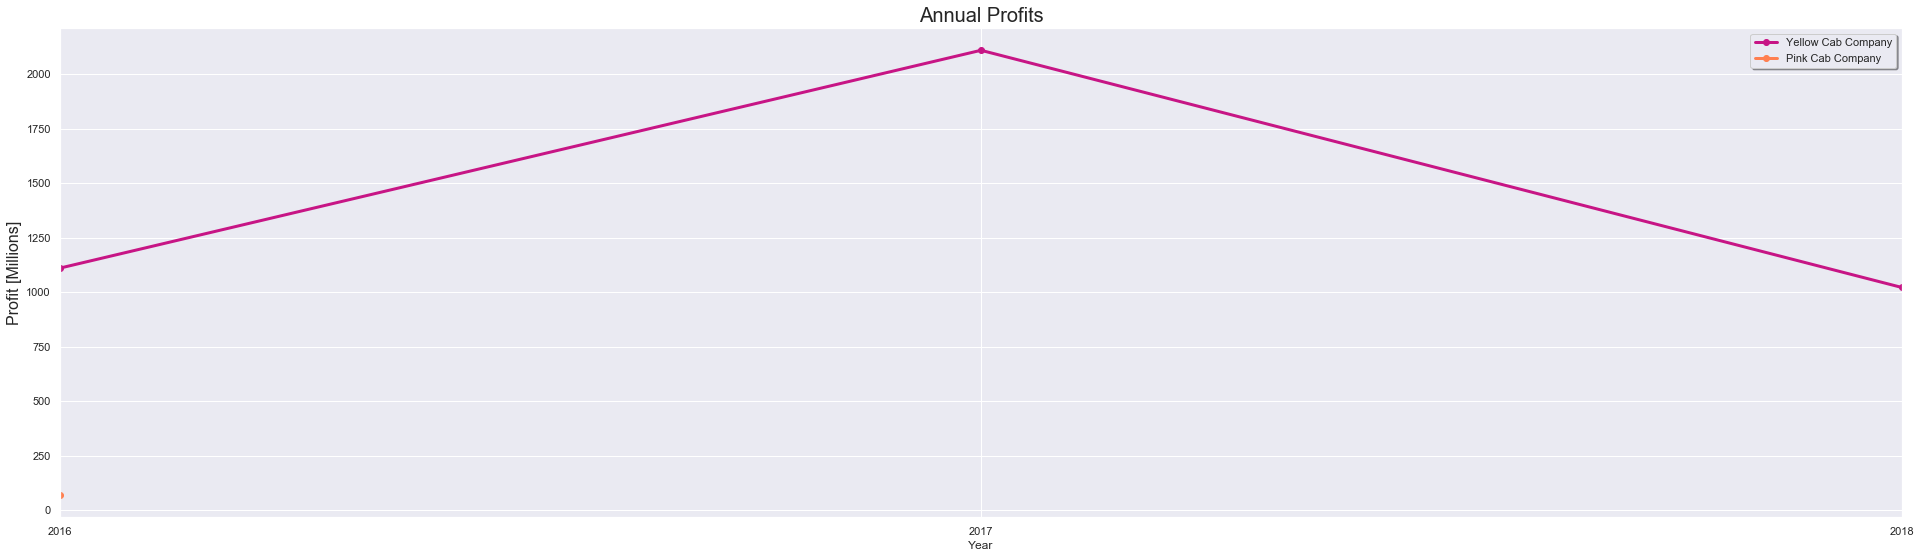

In [57]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('Y').sum().plot.line(color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3, marker='o')
fig=pinkcabst.Profit.resample('Y').sum().plot.line(color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')

plt.legend(loc='best', shadow=True)

In [58]:
round(masterdata.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,69.0
Yellow Cab,4242.0


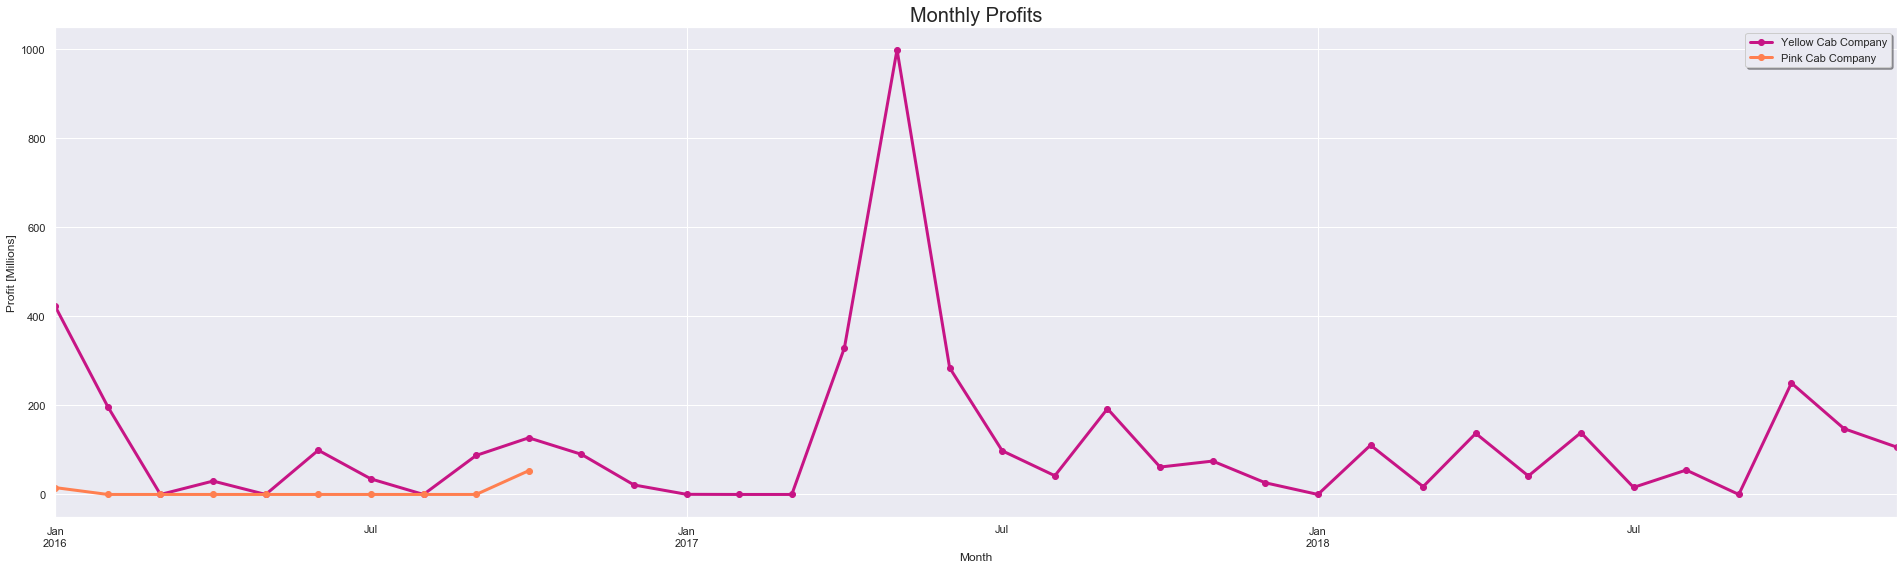

In [59]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('m').sum().plot.line(color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3, marker ='o')
fig=pinkcabst.Profit.resample('m').sum().plot.line(color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)


In [60]:
dpm=masterdata.groupby(['Company','Month of Travel'])['Profit'].sum().to_frame('Profit')
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)


In [61]:
y=yellowcabst.Profit.resample('m').sum().to_frame('Profit')
p=pinkcabst.Profit.resample('m').sum().to_frame('Profit')


In [62]:
print('YellowCab Company mean monthly profit = ', round(y.Profit.mean(),1),"  and it's std deviation is = ",round(y.Profit.std(),2), 'so, the percentage of the deviation is', round((y.Profit.std() /y.Profit.mean())*100,2),'%')
print('PinkCab Company mean monthly profit = ', round(p.Profit.mean(),1),"  and it's std deviation is = ",round(p.Profit.std(),2), 'so, the percentage of the deviation is', round((p.Profit.std() /p.Profit.mean())*100,2),'%')

YellowCab Company mean monthly profit =  117.8   and it's std deviation is =  182.12 so, the percentage of the deviation is 154.56 %
PinkCab Company mean monthly profit =  6.9   and it's std deviation is =  17.05 so, the percentage of the deviation is 247.78 %


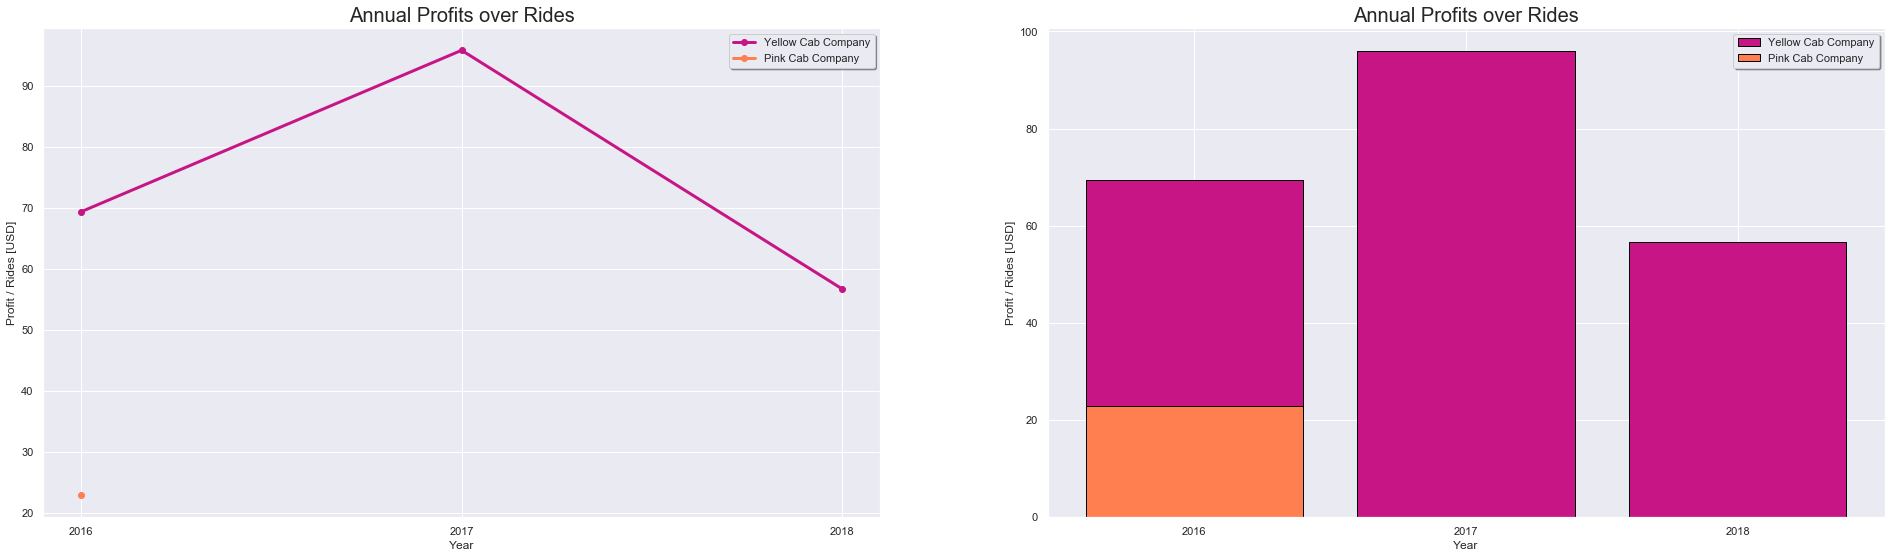

In [63]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitORides', data = ypy,color = 'mediumvioletred',edgecolor = 'black',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitORides', data = ppy, color = 'coral',edgecolor = 'black',label='Pink Cab Company')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.plot(x1.index.strftime('%Y'),'ProfitORides', data = ypy,color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3, marker = 'o')
plt.plot(x2.index.strftime('%Y'),'ProfitORides', data = ppy, color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

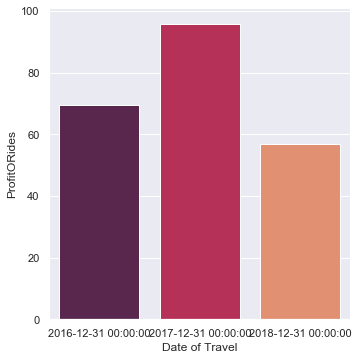

In [64]:
g=sns.catplot(ypy.index,'ProfitORides',data=ypy,kind='bar',palette = 'rocket')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, 
            p.get_height() * 1.02, 
            "${:.2f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
años = ['2016','2017','2018']
mapeado = range(len(años))
plt.xticks(mapeado, años, rotation =0)
plt.title('Yearly PoR YellowCab Company',fontsize=15)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')

Text(0.5, 8.95999999999998, 'Year')

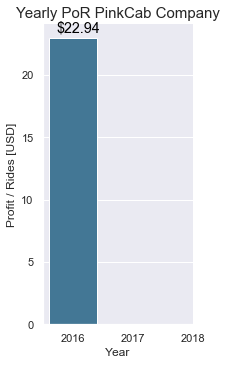

In [65]:
 g=sns.catplot(ppy.index,'ProfitORides',data=ppy,kind='bar',palette = 'mako')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, 
            p.get_height() * 1.02, 
            "${:.2f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
años = ['2016','2017','2018']
mapeado = range(len(años))
plt.xticks(mapeado, años, rotation =0)
plt.title('Yearly PoR PinkCab Company',fontsize=15)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')


In [66]:
lista=[1,2,3,4,5,6,7,8,9,10,11,12]
lista=lista*3

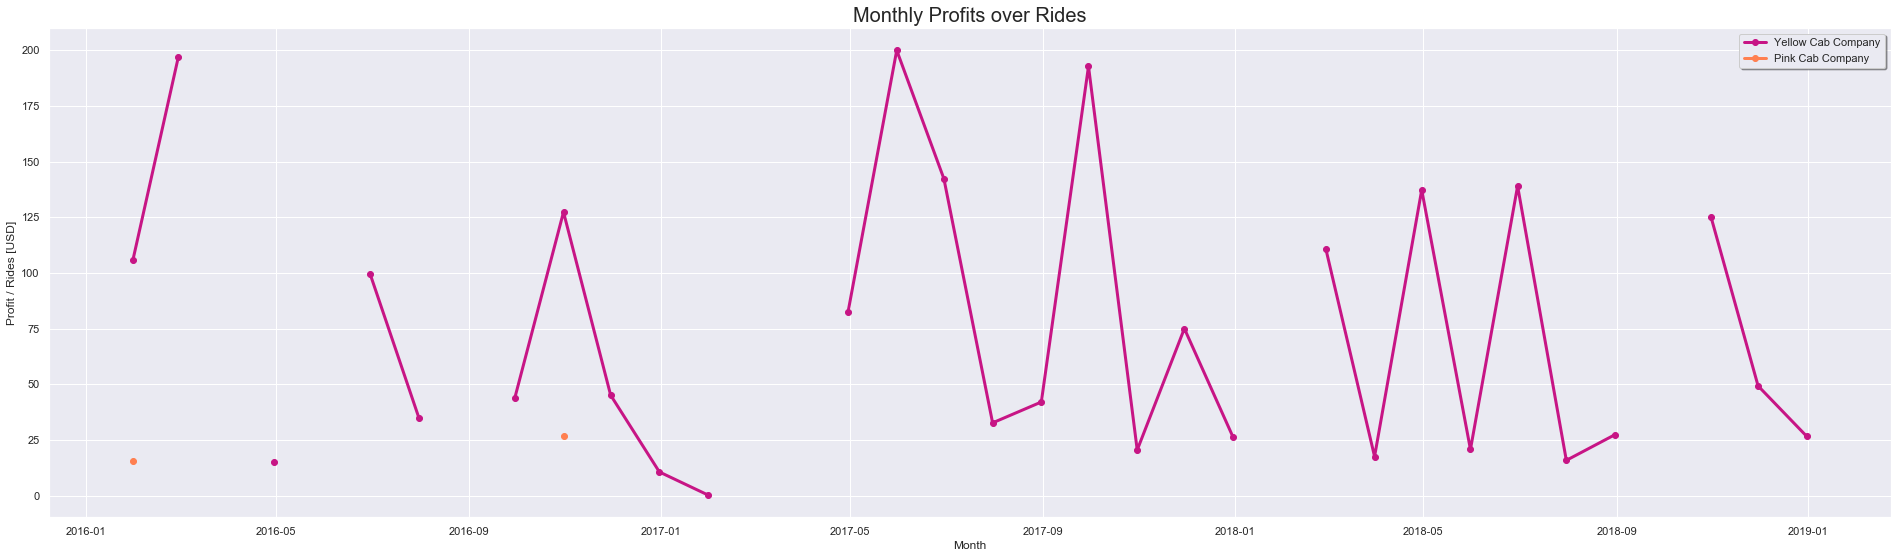

In [67]:
plt.figure(figsize=(33,9))

x1= ypm.ProfitORides.resample('m').sum()
x2= ppm.ProfitORides.resample('m').sum()
plt.plot(x1.index,'ProfitORides', data = ypm,color = 'mediumvioletred', linewidth = 3,label='Yellow Cab Company', marker='o')
plt.plot(x2.index,'ProfitORides', data = ppm, color = 'coral',linewidth = 3,label='Pink Cab Company', marker='o')
plt.xticks(rotation=0)
plt.title('Monthly Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)

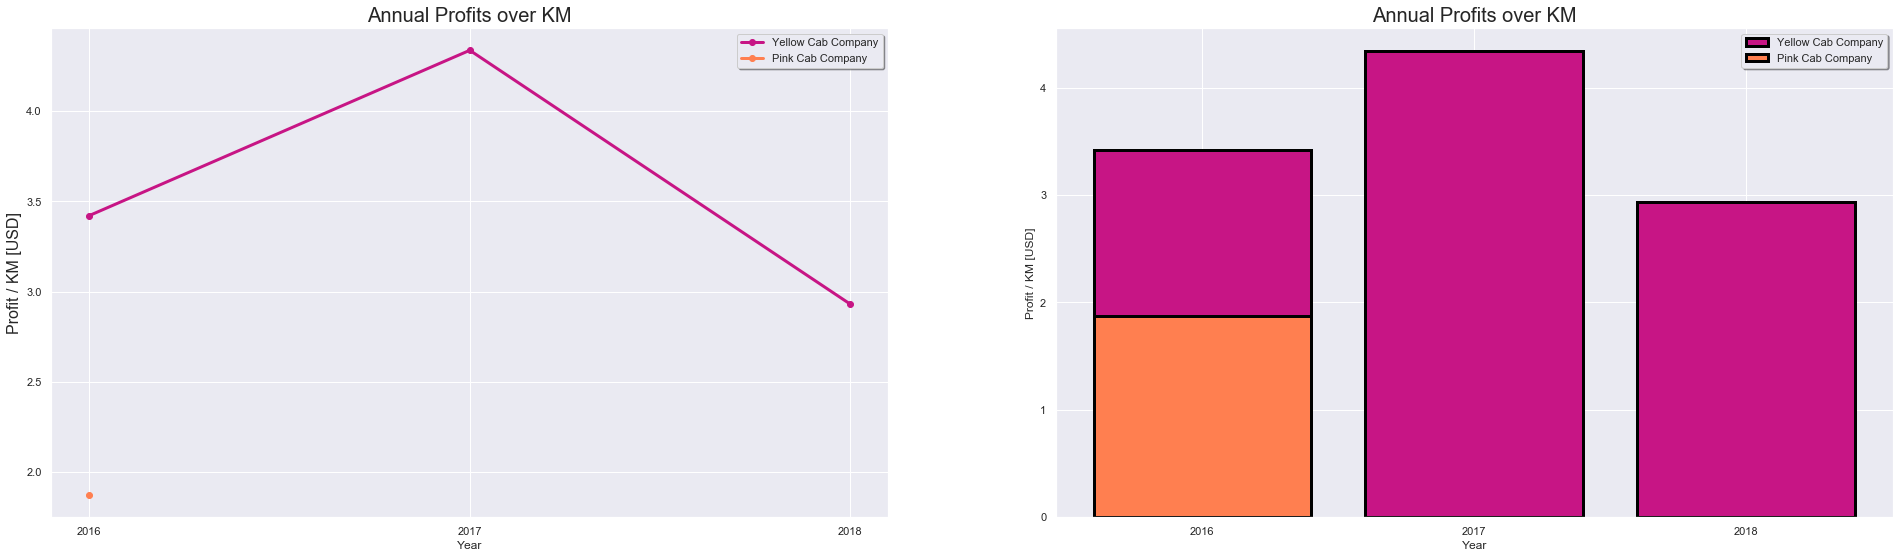

In [68]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitOKM', data = ypy,color = 'mediumvioletred',edgecolor = 'black',label='Yellow Cab Company',linewidth=3)
plt.bar(x= x2.index.strftime('%Y'), height='ProfitOKM', data = ppy, color = 'coral',edgecolor = 'black',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=0)
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.ylabel('Profit / KM [USD]', fontsize=16)
plt.plot(x1.index.strftime('%Y'),'ProfitOKM', data = ypy,color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3,marker='o')
plt.plot(x2.index.strftime('%Y'),'ProfitOKM', data = ppy, color = 'coral',label='Pink Cab Company',linewidth=3,marker='o')
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

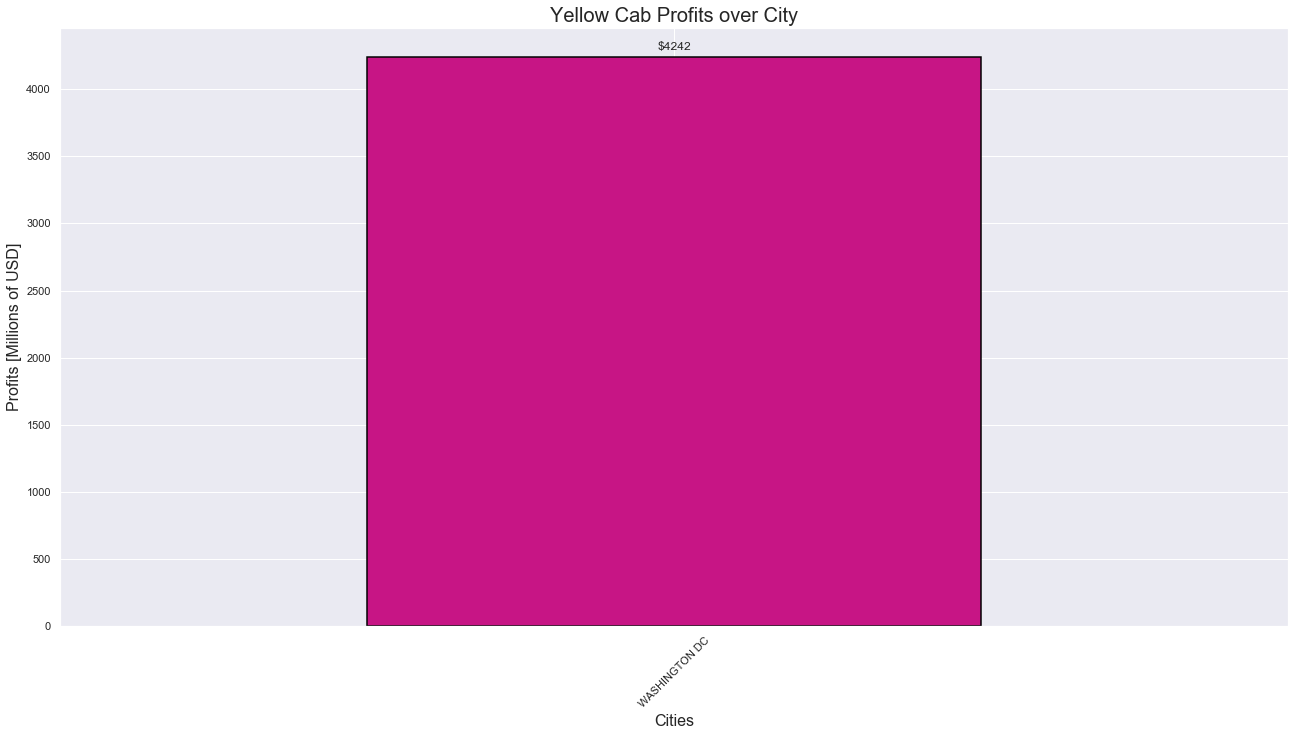

In [69]:
ppc= yellowcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'mediumvioletred',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)
add_value_labels(fig)

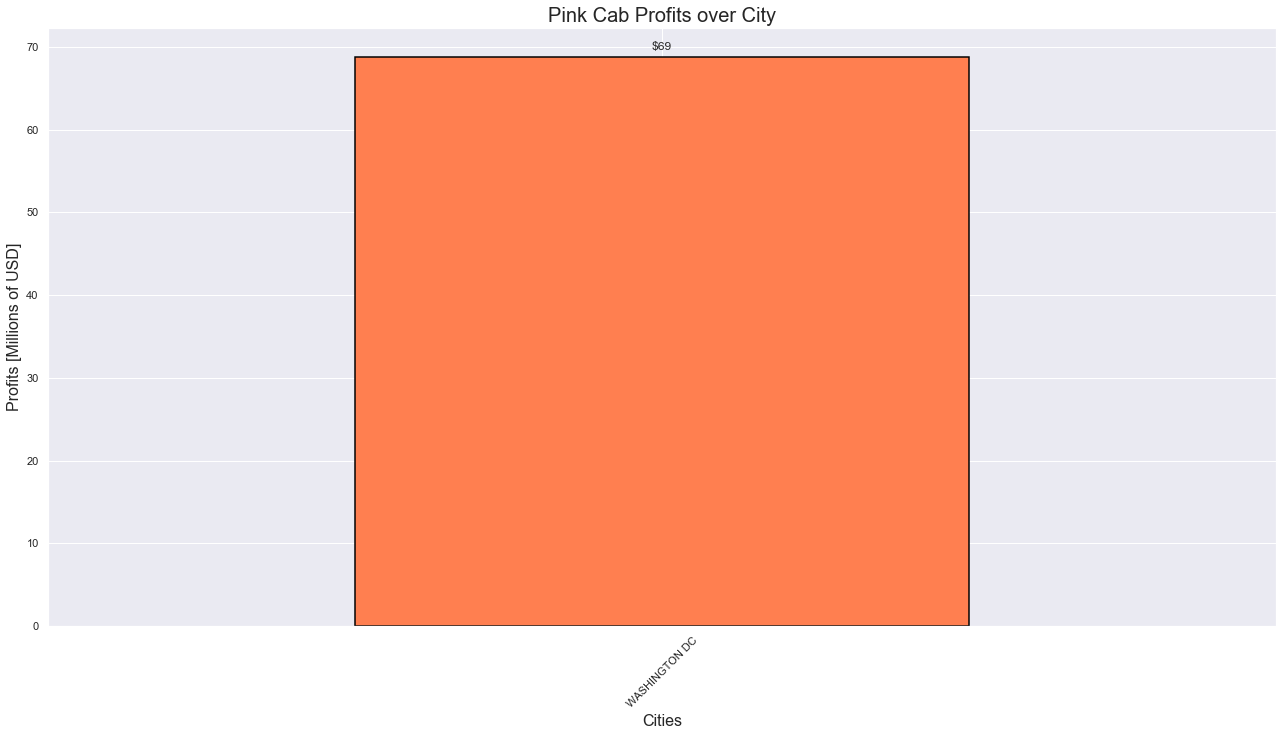

In [70]:
ppc= pinkcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'coral',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)
add_value_labels(fig)

In [71]:
h=masterdata.groupby(['Company','City']).Profit.sum().to_frame('Profit Over City')
h=h.reset_index(level='City', col_level=1)
h=h.reset_index(level='Company', col_level=1)
h = h.sort_values(by='Profit Over City', ascending= False )


In [72]:
h=h.drop([28,9],axis=0)
h.head()

KeyError: '[28  9] not found in axis'

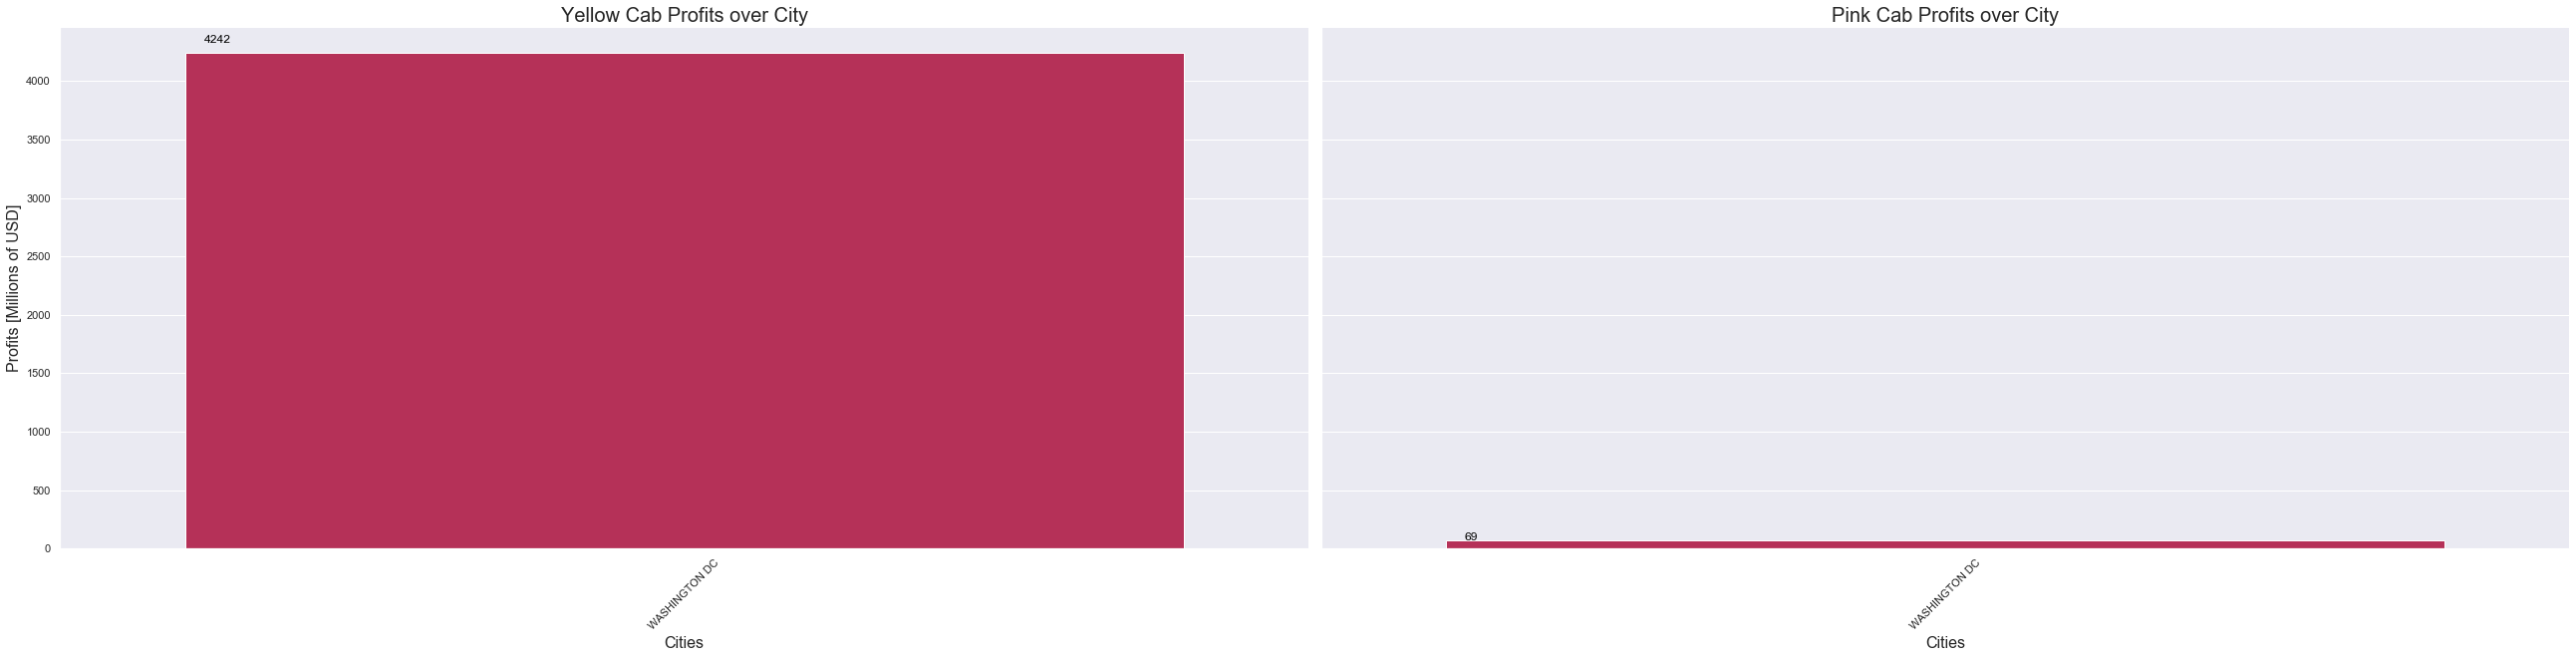

In [73]:
g=sns.catplot('City','Profit Over City',data=h,kind='bar',palette = 'rocket',col='Company', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)
plt.xticks(rotation=45)
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [74]:
yellowcabnp=yellowcab[(yellowcab['Profit']<0)]
yellowcabnp= yellowcabnp.City.value_counts()
yellowcabnp=pd.DataFrame(yellowcabnp)
yellowcabnp.columns=['q']
pinkcabnp=pinkcab[(pinkcab['Profit']<0)]
pinkcabnp= pinkcabnp.City.value_counts()
pinkcabnp=pd.DataFrame(pinkcabnp)
pinkcabnp.columns=['q']

In [75]:
yellowcabnp['Q']= yellowcab.City.value_counts() - yellowcabnp['q']
yellowcabnp['per']= ((1- (yellowcabnp['q'] / (yellowcabnp['q']+yellowcabnp['Q'])))*100)
yellowcabnp= yellowcabnp[['Q','q','per']]
yellowcabnp['Q']= yellowcabnp['Q'].astype(int)
yellowcabnp = yellowcabnp.sort_values(by='per', ascending= False )
yellowcabnp.head(30)
yellowcabnp.shape
pinkcabnp['Q']= pinkcab.City.value_counts() - pinkcabnp['q']
pinkcabnp['per']= ((1- (pinkcabnp['q'] / (pinkcabnp['q']+pinkcabnp['Q'])))*100)
pinkcabnp= pinkcabnp[['Q','q','per']]
pinkcabnp['Q']= pinkcabnp['Q'].astype(int)
pinkcabnp = pinkcabnp.sort_values(by='per', ascending= False )
pinkcabnp.head(30)
pinkcabnp.shape

ValueError: Cannot convert non-finite values (NA or inf) to integer

Text(0.5, 0, 'Cities')

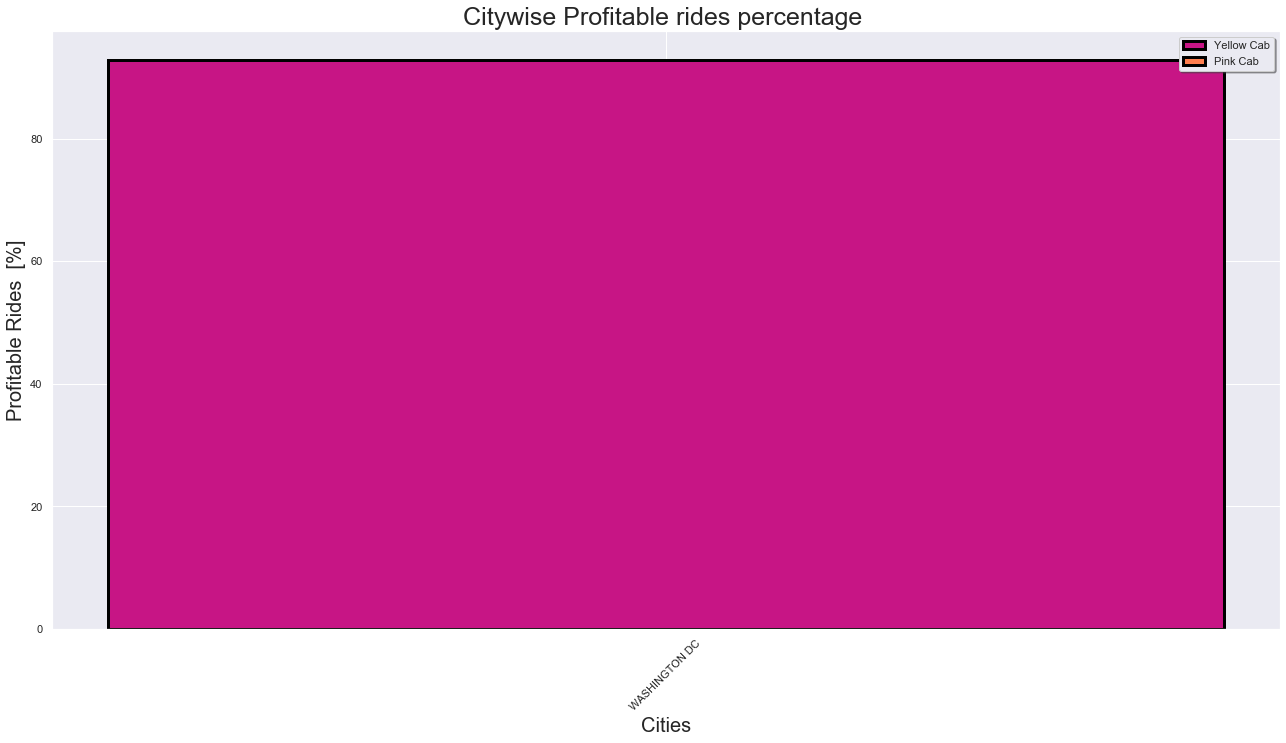

In [76]:
plt.figure(figsize=(22,11))
plt.bar(x= yellowcabnp.index, height='per', data = yellowcabnp,edgecolor = 'black',color = 'mediumvioletred',linewidth=3,label='Yellow Cab',)
plt.bar(x= pinkcabnp.index, height='per', data = pinkcabnp,edgecolor = 'black',color = 'coral',linewidth=3,label='Pink Cab',)
plt.xticks(rotation=45)
plt.ylabel('Profitable Rides  [%]', fontsize=20)
plt.title('Citywise Profitable rides percentage ', fontsize = 25)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=20)


In [77]:
dpm=masterdata.groupby(['Company','Month of Travel'])['Transaction ID'].agg(['count'])
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)
dpm = dpm.sort_values(by='count', ascending= False )

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


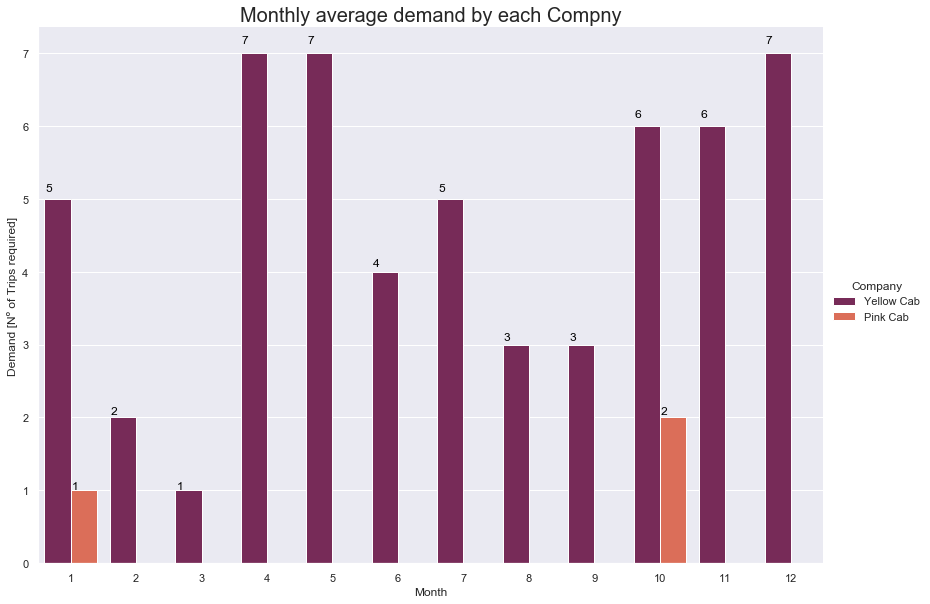

In [78]:
g=sns.catplot('Month of Travel','count',data=dpm,kind='bar',hue='Company',palette = 'rocket', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Monthly average demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Month')
plt.show()


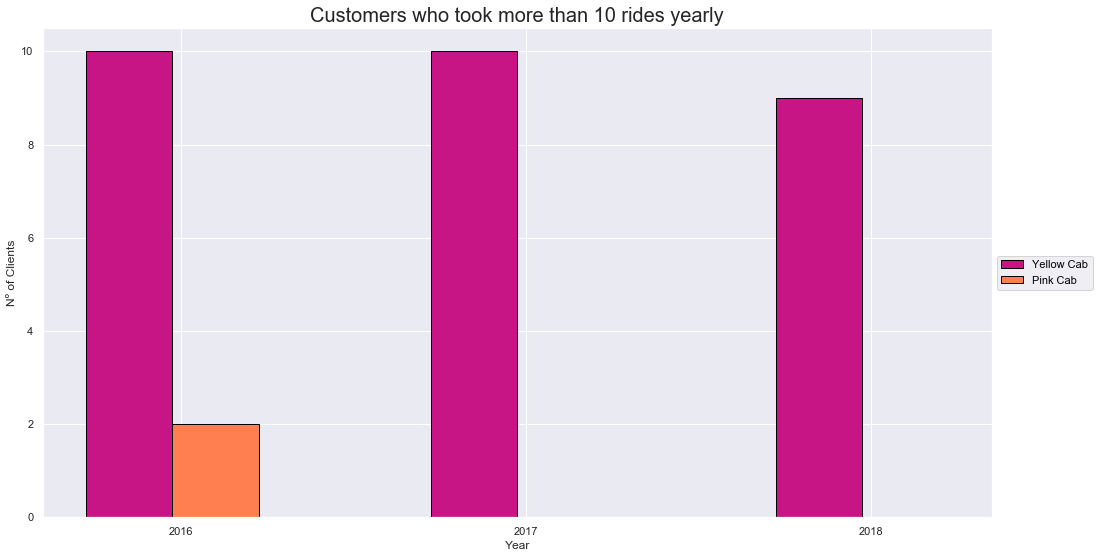

In [79]:
years=[2016,2017,2018]
c10r_y=[]
c10r_p=[]
for year in years:
  yellow_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_y.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_p.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(3)
plt.bar(X+0.00,c10r_y,color='mediumvioletred', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_p,color='coral',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides yearly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

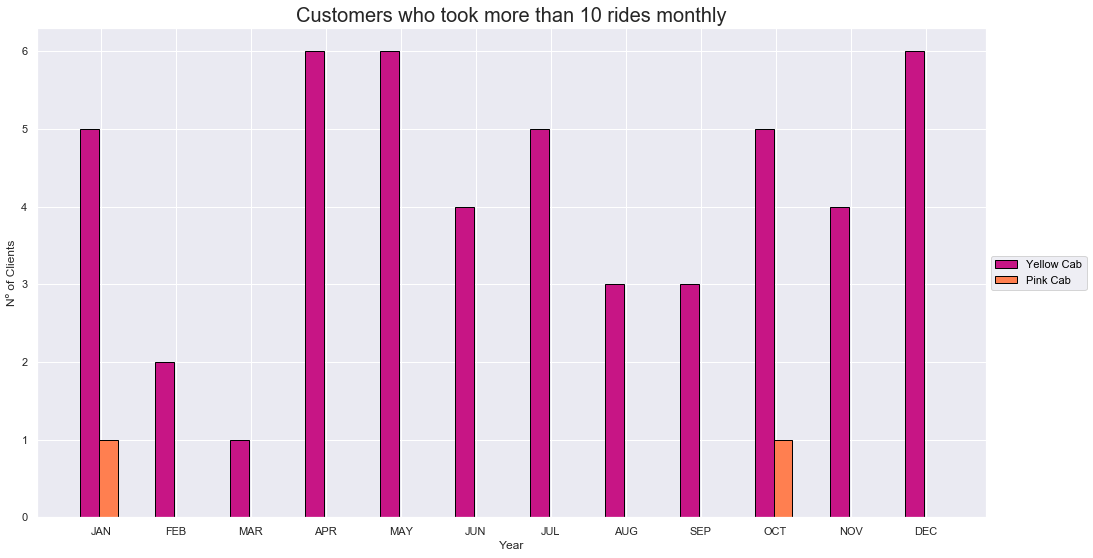

In [80]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
c10r_ym=[]
c10r_pm=[]
for month in months:
  yellow_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_ym.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_pm.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(12)
plt.bar(X+0.00,c10r_ym,color='mediumvioletred', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_pm,color='coral',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides monthly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

In [81]:
u=masterdata.groupby(['Year of Travel'])['Transaction ID'].agg(['count'])
u.columns = ['RidesPerYear']
u=u.reset_index(level='Year of Travel', col_level=1)
payment=masterdata.groupby(['Year of Travel','Payment_Mode'])['Transaction ID'].agg(['count'])
payment=payment.reset_index(level='Year of Travel', col_level=1)
payment=payment.reset_index(level='Payment_Mode', col_level=1)
payment=payment.merge(u,on= 'Year of Travel')
payment.head()
payment1=payment
payment1['per']=payment1['count']/payment1['RidesPerYear']
payment.head()

,Payment_Mode,Year of Travel,count,RidesPerYear,per
0,Card,2016,12,19,0.631579
1,Cash,2016,7,19,0.368421
2,Card,2017,10,22,0.454545
3,Cash,2017,12,22,0.545455
4,Card,2018,9,18,0.500000


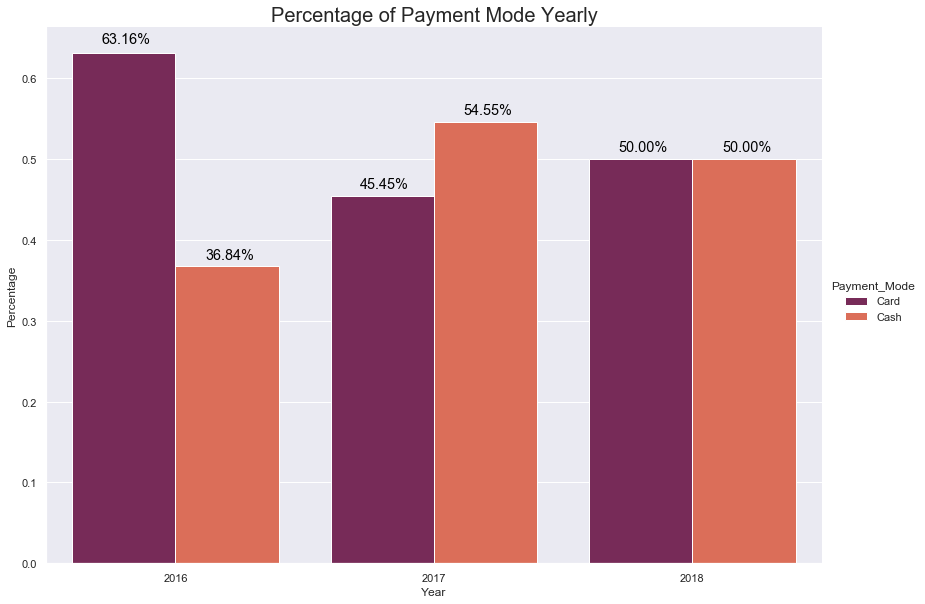

In [82]:
g=sns.catplot('Year of Travel','per',data=payment1,kind='bar',hue='Payment_Mode',palette="rocket", height=8.27, aspect=11.7/8.27)
plt.title('Percentage of Payment Mode Yearly',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()*100), 
            color='black', rotation='horizontal', size='large')
plt.show()

In [83]:
payment2=masterdata.groupby(['Year of Travel','Payment_Mode','City'])['Transaction ID'].agg(['count'])
payment2=payment2.reset_index(level='Year of Travel', col_level=1)
payment2=payment2.reset_index(level='Payment_Mode', col_level=1)
payment2=payment2.reset_index(level='City', col_level=1)
payment2 = payment2.sort_values(by='count', ascending= False )
payment2.head()

,City,Payment_Mode,Year of Travel,count
0,WASHINGTON DC,Card,2016,12
3,WASHINGTON DC,Cash,2017,12
2,WASHINGTON DC,Card,2017,10
4,WASHINGTON DC,Card,2018,9
5,WASHINGTON DC,Cash,2018,9


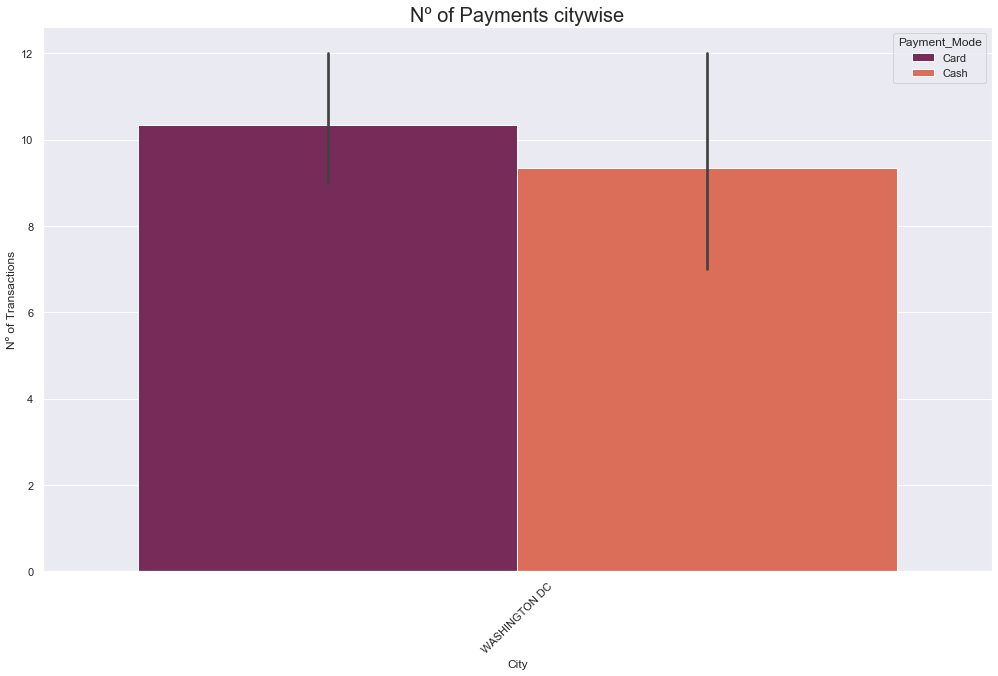

In [84]:
fig, ax = plt.subplots(figsize = (17, 10))

sns.barplot('City','count',data=payment2,hue='Payment_Mode',palette="rocket")
plt.title('Nº of Payments citywise',fontsize=20)
plt.xlabel('City')
plt.ylabel('Nº of Transactions')
plt.xticks(rotation=45)
plt.show()

In [85]:
holidaydata

,Date,Holiday,WeekDay,Month,Day,Year
12,2016-07-04,4th of July,Monday,7,4,2016
13,2017-07-04,4th of July,Tuesday,7,4,2017
14,2018-07-04,4th of July,Wednesday,7,4,2018
30,2016-12-25,Christmas Day,Sunday,12,25,2016
31,2017-12-25,Christmas Day,Monday,12,25,2017
32,2018-12-25,Christmas Day,Tuesday,12,25,2018
48,2016-12-24,Christmas Eve,Saturday,12,24,2016
49,2017-12-24,Christmas Eve,Sunday,12,24,2017
50,2018-12-24,Christmas Eve,Monday,12,24,2018
56,2018-10-08,Columbus Day,Monday,10,8,2018


In [87]:
sampledata =cabdata.merge(trancation, on= 'Transaction ID').merge(customer, on ='Customer ID').merge(city, on = 'City')

KeyError: 'Date'

In [89]:
sampledata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228,542085.0,3643.0
359388,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085.0,3643.0
359389,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085.0,3643.0
359390,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085.0,3643.0


In [90]:
sampledata["Date"] = holidaydata["Date"]

In [91]:
sampledata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,NaT
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,NaT
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0,NaT
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0,NaT
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228,542085.0,3643.0,NaT
359388,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085.0,3643.0,NaT
359389,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085.0,3643.0,NaT
359390,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085.0,3643.0,NaT


In [92]:
sampledata.merge(holidaydata,how='left', left_on='Date', right_on='Date')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359389,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN
359390,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN
359391,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN
359392,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085.0,3643.0,NaT,NaN,NaN,NaN,NaN,NaN


In [93]:
sampledata = sampledata.merge(holidaydata, on=['Date'])

In [94]:
sampledata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Holiday,WeekDay,Month,Day,Year
0,10001291,2016-01-01,Yellow Cab,WASHINGTON DC,8.73,168.07,104.7600,53683,Card,Male,26,9389,418859.0,127001.0,2016-07-04,4th of July,Monday,7,4,2016
1,10025750,2016-04-14,Yellow Cab,WASHINGTON DC,2.85,46.01,34.8840,53683,Card,Male,26,9389,418859.0,127001.0,2017-07-04,4th of July,Tuesday,7,4,2017
2,10127859,2016-12-20,Yellow Cab,WASHINGTON DC,7.84,129.43,107.2512,53683,Cash,Male,26,9389,418859.0,127001.0,2018-07-04,4th of July,Wednesday,7,4,2018
3,10164608,2017-04-16,Yellow Cab,WASHINGTON DC,6.65,112.67,91.7700,53126,Card,Male,24,3032,418859.0,127001.0,2016-12-25,Christmas Day,Sunday,12,25,2016
4,10181246,2017-06-03,Yellow Cab,WASHINGTON DC,27.55,510.60,373.5780,53126,Cash,Male,24,3032,418859.0,127001.0,2017-12-25,Christmas Day,Monday,12,25,2017
5,10196498,2017-07-13,Yellow Cab,WASHINGTON DC,22.05,368.12,288.4140,53126,Card,Male,24,3032,418859.0,127001.0,2018-12-25,Christmas Day,Tuesday,12,25,2018
6,10193619,2017-07-07,Yellow Cab,WASHINGTON DC,20.23,287.74,269.4636,52880,Cash,Male,27,14140,418859.0,127001.0,2016-12-24,Christmas Eve,Saturday,12,24,2016
7,10211735,2017-08-18,Yellow Cab,WASHINGTON DC,25.99,397.62,355.5432,52880,Card,Male,27,14140,418859.0,127001.0,2017-12-24,Christmas Eve,Sunday,12,24,2017
8,10221647,2017-09-03,Yellow Cab,WASHINGTON DC,33.06,593.39,400.6872,52880,Cash,Male,27,14140,418859.0,127001.0,2018-12-24,Christmas Eve,Monday,12,24,2018
9,10338106,2018-06-07,Yellow Cab,WASHINGTON DC,23.92,477.69,338.7072,52880,Cash,Male,27,14140,418859.0,127001.0,2018-10-08,Columbus Day,Monday,10,8,2018


In [95]:
sampledata.shape

(59, 20)

In [96]:
holidaydata

,Date,Holiday,WeekDay,Month,Day,Year
12,2016-07-04,4th of July,Monday,7,4,2016
13,2017-07-04,4th of July,Tuesday,7,4,2017
14,2018-07-04,4th of July,Wednesday,7,4,2018
30,2016-12-25,Christmas Day,Sunday,12,25,2016
31,2017-12-25,Christmas Day,Monday,12,25,2017
32,2018-12-25,Christmas Day,Tuesday,12,25,2018
48,2016-12-24,Christmas Eve,Saturday,12,24,2016
49,2017-12-24,Christmas Eve,Sunday,12,24,2017
50,2018-12-24,Christmas Eve,Monday,12,24,2018
56,2018-10-08,Columbus Day,Monday,10,8,2018
